# **⭐ Regression Model to Predict Chance of Admission**

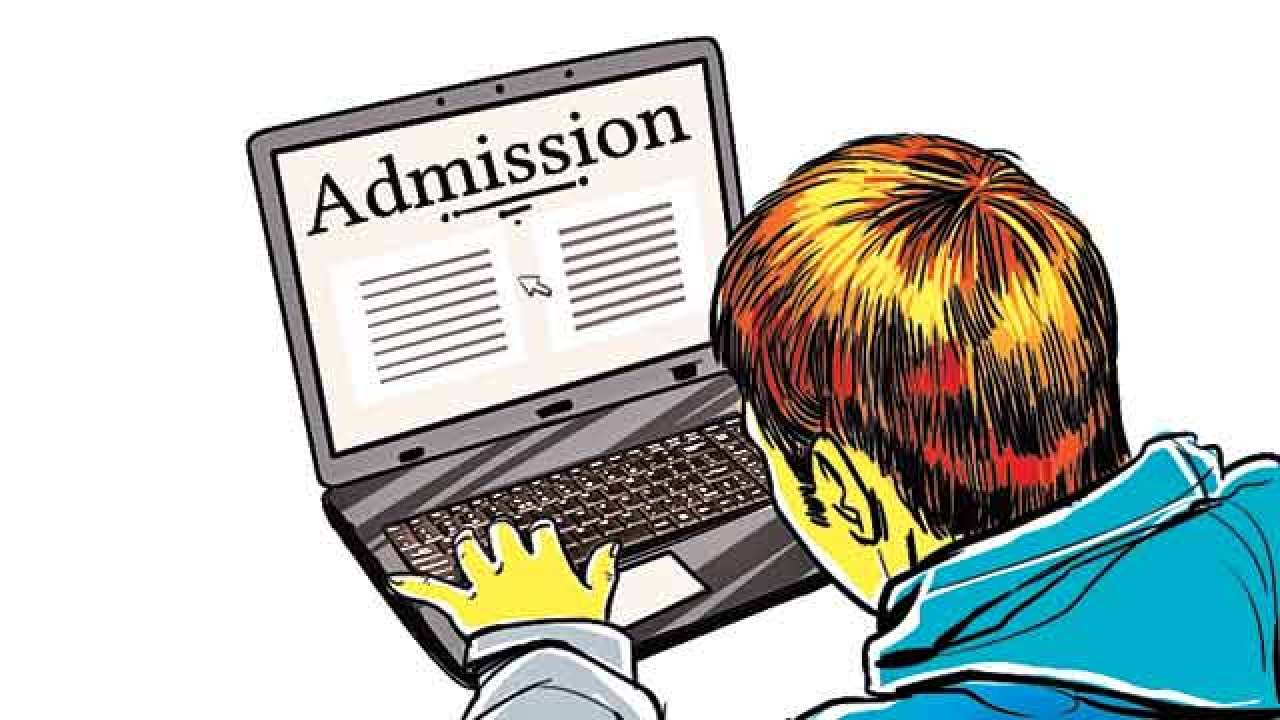

Features in the dataset:

1. GRE Scores (290 to 340)
2. TOEFL Scores (92 to 120)
3. University Rating (1 to 5)
4. Statement of Purpose (1 to 5)
5. Letter of Recommendation Strength (1 to 5)
6. Undergraduate CGPA (6.8 to 9.92)
7. Research Experience (0 or 1)
8. Chance of Admit (0.34 to 0.97)

In [30]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
# import data
admission = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv',index_col="Serial No")

In [19]:
# view data
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
# info of data
admission.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3    SOP               400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [21]:
# summary statistics
admission.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [22]:
# check for missing value
admission.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [23]:
# check for categories
admission.nunique()


GRE Score             49
TOEFL Score           29
University Rating      5
 SOP                   9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

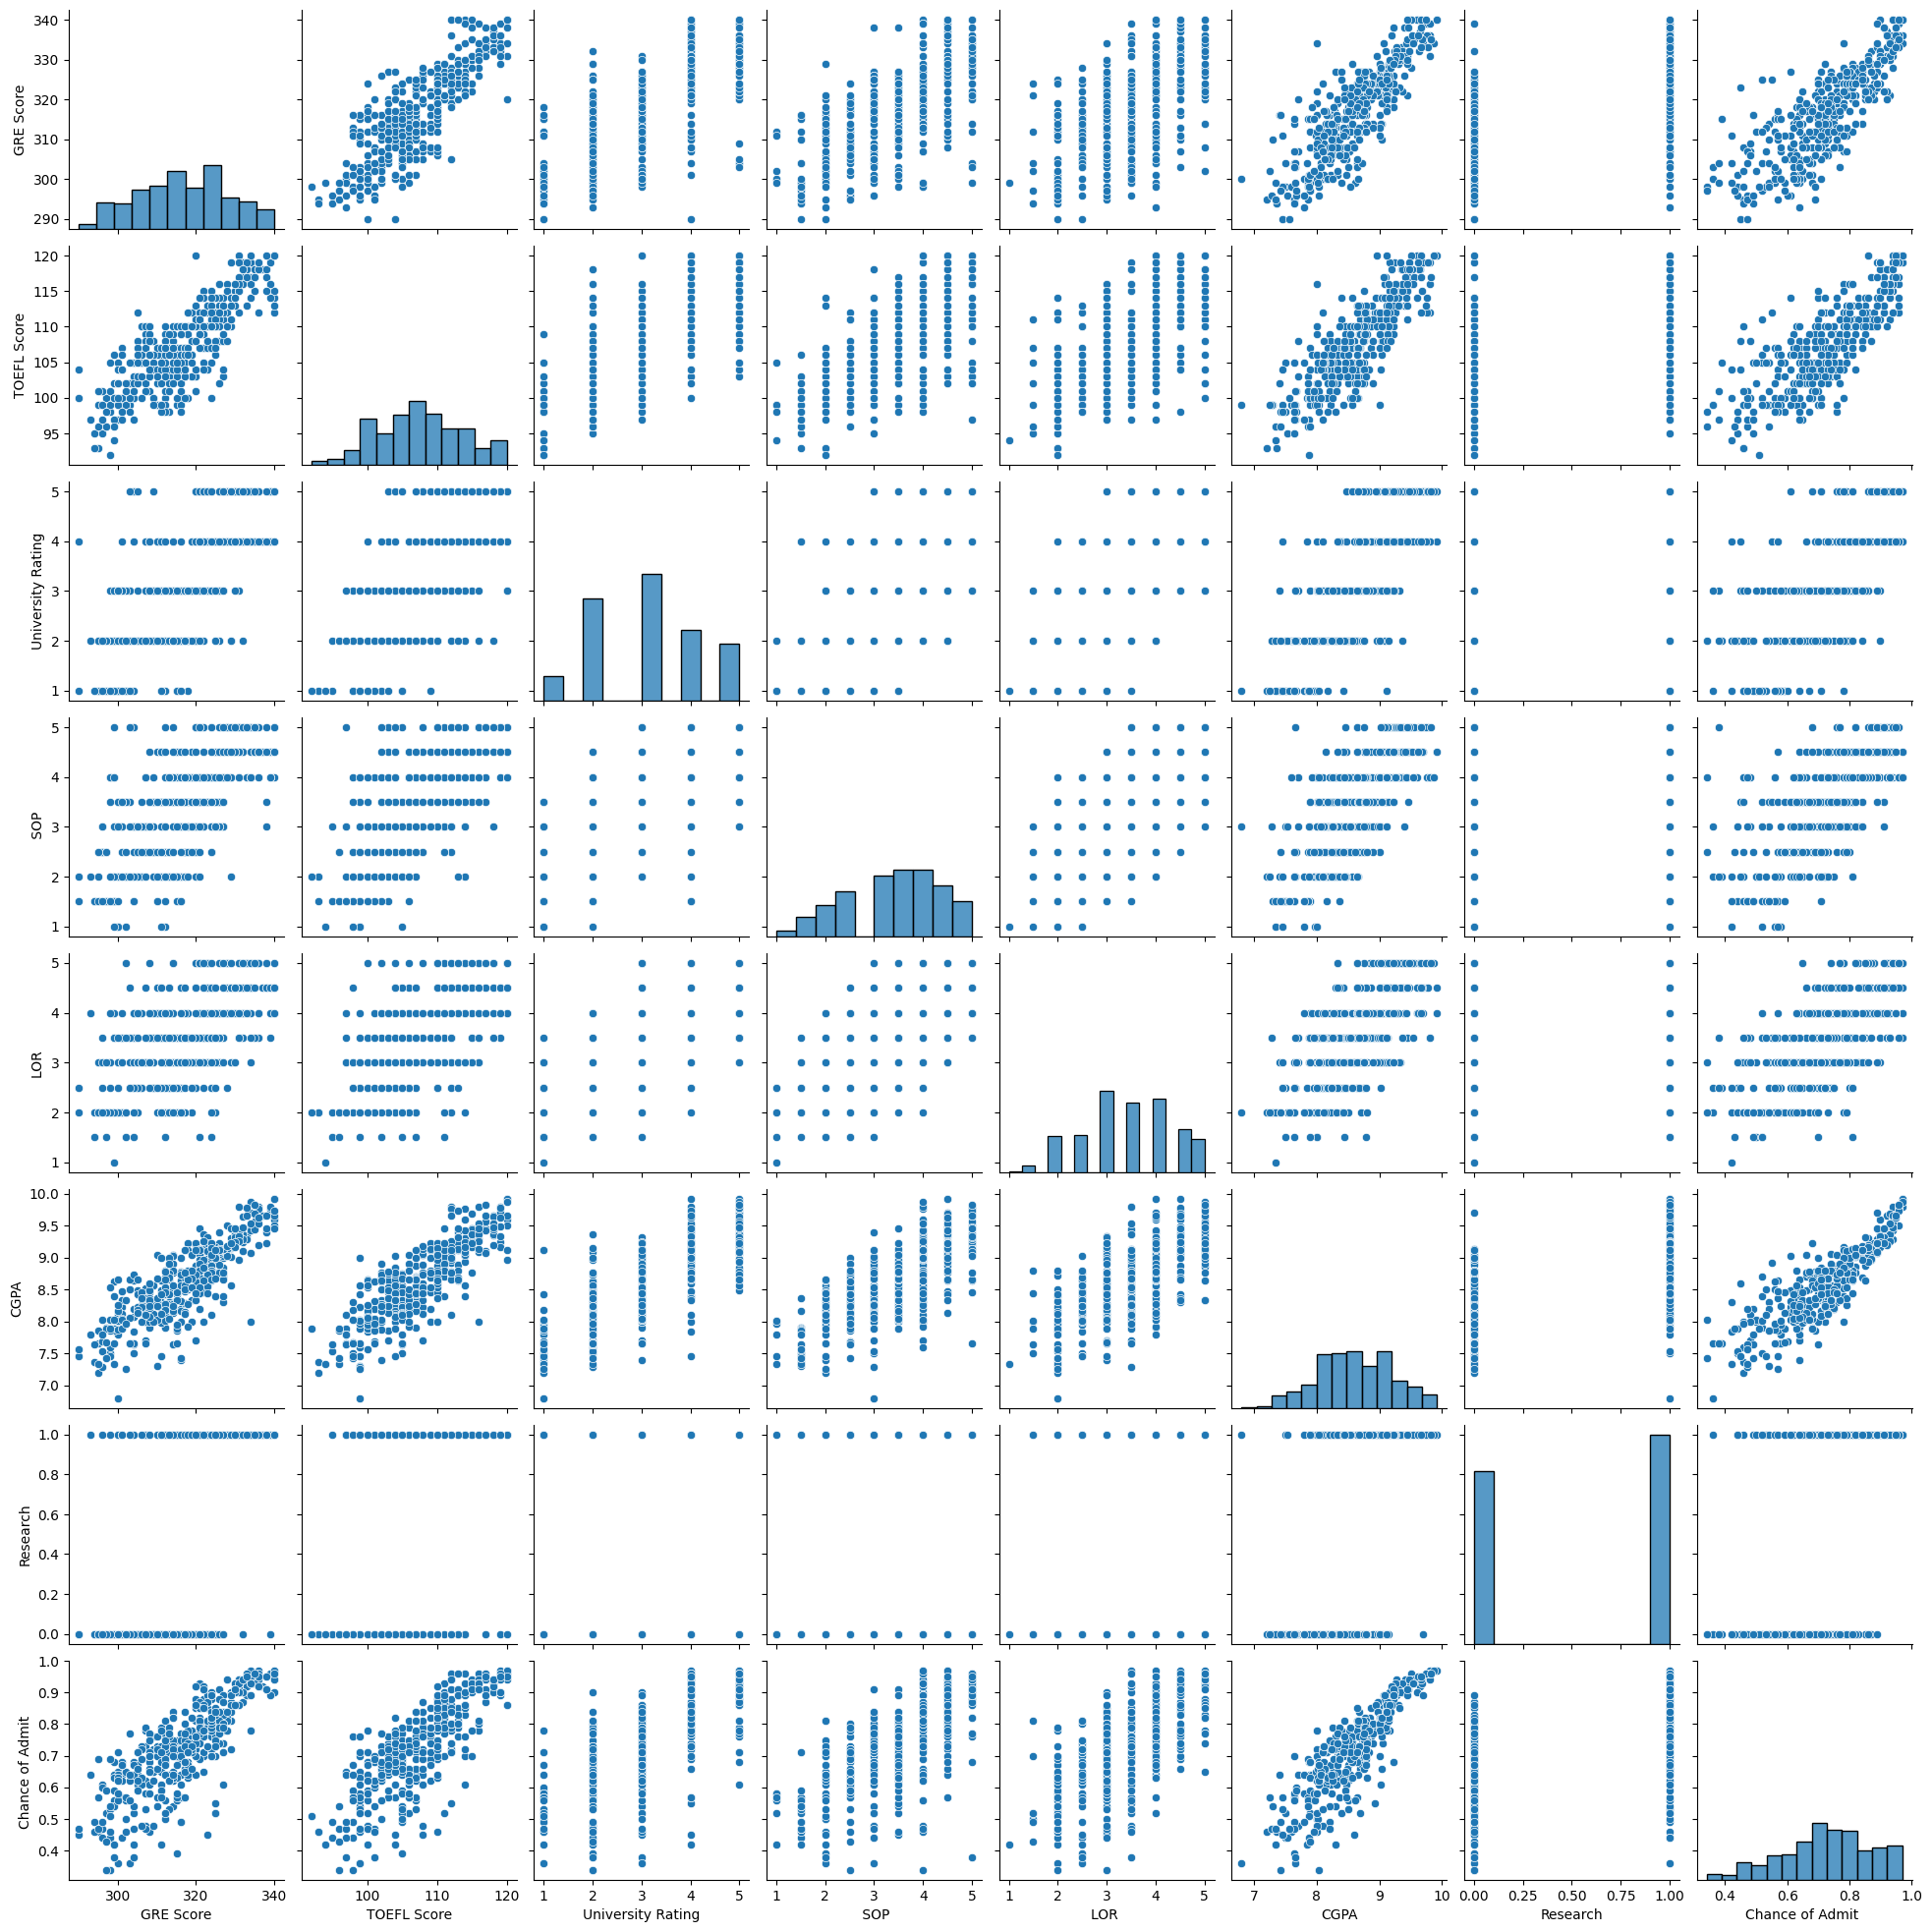

In [24]:
# visualize pairplot
sns.pairplot(admission)


In [25]:
# columns name
admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
# define y
y=admission['Chance of Admit ']

In [29]:
# define X
X=admission[['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research']]


In [31]:
# split data

xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0,test_size=.25)

In [32]:
# verify shape

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((300, 7), (100, 7), (300,), (100,))

In [34]:
# select model
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [35]:
# train model
l.fit(xtrain,ytrain)

LinearRegression()

In [36]:
# predict with model4
y_pre=l.predict(xtest)


In [46]:
# model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
r2_score(y_pre,ytest)


0.6486315648453742

In [42]:
# model MAE
mean_absolute_error(y_pre,ytest)


0.04911363530859199

In [43]:
# model MAPE
mean_absolute_percentage_error(y_pre,ytest)

0.0732147633889138

In [47]:
# model MSE
mean_squared_error(y_pre,ytest)


0.004801498976816872

In [51]:
# future prediction
from array import array


l.predict([[252,316,99,2,2.5,3.0,9.0]])

c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.98256589])

In [54]:
# define X_new
x=[[316 ,99,2,2.5,3.0,9.0,0]]


In [55]:
# predict for X_new

l.predict(x)

c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.73351084])